In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [54]:
liver_df = pd.read_csv('C:/Users/kanka/OneDrive/Desktop/Final Project/Datasets/IndianLiverPatient.csv',  delimiter=',')

liver_df


65 Female   0.7  0.1  187  16   18  6.8  3.3   0.9  1
0    62   Male  10.9  5.5  699  64  100  7.5  3.2  0.74  1
1    62   Male   7.3  4.1  490  60   68  7.0  3.3  0.89  1
2    58   Male   1.0  0.4  182  14   20  6.8  3.4  1.00  1
3    72   Male   3.9  2.0  195  27   59  7.3  2.4  0.40  1
4    46   Male   1.8  0.7  208  19   14  7.6  4.4  1.30  1
..   ..    ...   ...  ...  ...  ..  ...  ...  ...   ... ..
577  60   Male   0.5  0.1  500  20   34  5.9  1.6  0.37  2
578  40   Male   0.6  0.1   98  35   31  6.0  3.2  1.10  1
579  52   Male   0.8  0.2  245  48   49  6.4  3.2  1.00  1
580  31   Male   1.3  0.5  184  29   32  6.8  3.4  1.00  1
581  38   Male   1.0  0.3  216  21   24  7.3  4.4  1.50  2

[582 rows x 11 columns]

In [55]:
liver_df.columns = ['Age', 'Gender', 'Total Bilirubin', 'Direct Bilirubin', 
                   'Alkaline Phosphotase', 'Alamine Aminotransferase', 'Aspartate Aminotransferase', 'Total Protiens', 'Albumin','A/G Ratio Albumin and Globulin', 'Class']

In [56]:
liver_df

Age Gender  Total Bilirubin  Direct Bilirubin  Alkaline Phosphotase  \
0     62   Male             10.9               5.5                   699   
1     62   Male              7.3               4.1                   490   
2     58   Male              1.0               0.4                   182   
3     72   Male              3.9               2.0                   195   
4     46   Male              1.8               0.7                   208   
..   ...    ...              ...               ...                   ...   
577   60   Male              0.5               0.1                   500   
578   40   Male              0.6               0.1                    98   
579   52   Male              0.8               0.2                   245   
580   31   Male              1.3               0.5                   184   
581   38   Male              1.0               0.3                   216   

     Alamine Aminotransferase  Aspartate Aminotransferase  Total Protiens  \
0                          64                         100             7.5   
1                          60                          68             7.0   
2                          14                          20             6.8   
3                          27                          59             7.3   
4                          19                          14             7.6   
..                        ...                         ...             ...   
577                        20                          34             5.9   
578                        35                          31             6.0   
579                        48                          49             6.4   
580                        29                          32             6.8   
581                        21                          24             7.3   

     Albumin  A/G Ratio Albumin and Globulin  Class  
0        3.2                            0.74      1  
1        3.3                            0.89      1  
2        3.4                            1.00      1  
3        2.4                            0.40      1  
4        4.4                            1.30      1  
..       ...                             ...    ...  
577      1.6                            0.37      2  
578      3.2                            1.10      1  
579      3.2                            1.00      1  
580      3.4                            1.00      1  
581      4.4                            1.50      2  

[582 rows x 11 columns]

In [57]:
liver_df.dtypes

Age                                 int64
Gender                             object
Total Bilirubin                   float64
Direct Bilirubin                  float64
Alkaline Phosphotase                int64
Alamine Aminotransferase            int64
Aspartate Aminotransferase          int64
Total Protiens                    float64
Albumin                           float64
A/G Ratio Albumin and Globulin    float64
Class                               int64
dtype: object

In [58]:
liver_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             582 non-null    int64  
 1   Gender                          582 non-null    object 
 2   Total Bilirubin                 582 non-null    float64
 3   Direct Bilirubin                582 non-null    float64
 4   Alkaline Phosphotase            582 non-null    int64  
 5   Alamine Aminotransferase        582 non-null    int64  
 6   Aspartate Aminotransferase      582 non-null    int64  
 7   Total Protiens                  582 non-null    float64
 8   Albumin                         582 non-null    float64
 9   A/G Ratio Albumin and Globulin  578 non-null    float64
 10  Class                           582 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.1+ KB


In [59]:
c = liver_df.isnull().sum()
plt.title("Missing data statistics")
c.plot(kind='barh')
print(c)

Age                               0
Gender                            0
Total Bilirubin                   0
Direct Bilirubin                  0
Alkaline Phosphotase              0
Alamine Aminotransferase          0
Aspartate Aminotransferase        0
Total Protiens                    0
Albumin                           0
A/G Ratio Albumin and Globulin    4
Class                             0
dtype: int64


In [60]:
liver_df = liver_df.dropna() 

In [61]:
#*********Checking for missing values*****************
Missingvalue_stats = liver_df.isnull().sum()
plt.title("Missing value information")
Missingvalue_stats.plot(kind='bar') #Bar chart to plot count of missing values

In [62]:
patient, non_patient = liver_df['Class'].value_counts()
print('Count of Liver patients', patient)
print('Count of Non-Liver patients', non_patient)
liver_df['Class'].value_counts().plot(kind='bar', title='Target field distribution')
plt.show()

Count of Liver patients 413
Count of Non-Liver patients 165


In [63]:
replace = {"Class":     {2: 0}}
liver_df = liver_df.replace(replace)
liver_df.head()

Age Gender  Total Bilirubin  Direct Bilirubin  Alkaline Phosphotase  \
0   62   Male             10.9               5.5                   699   
1   62   Male              7.3               4.1                   490   
2   58   Male              1.0               0.4                   182   
3   72   Male              3.9               2.0                   195   
4   46   Male              1.8               0.7                   208   

   Alamine Aminotransferase  Aspartate Aminotransferase  Total Protiens  \
0                        64                         100             7.5   
1                        60                          68             7.0   
2                        14                          20             6.8   
3                        27                          59             7.3   
4                        19                          14             7.6   

   Albumin  A/G Ratio Albumin and Globulin  Class  
0      3.2                            0.74      1  
1      3.3                            0.89      1  
2      3.4                            1.00      1  
3      2.4                            0.40      1  
4      4.4                            1.30      1

In [64]:
patient, non_patient = liver_df['Class'].value_counts()
print('Count of Liver patients', patient)
print('Count of Non-Liver patients', non_patient)
sns.countplot(x="Class", hue="Class", data=liver_df)
plt.ylabel('Count')
plt.xlabel('Class (1:Liver patients, 0: Non-liver patients)')
plt.title('Distribution of the targte field')
plt.show()


Count of Liver patients 413
Count of Non-Liver patients 165


In [43]:
plt.figure(figsize=(4,4))
plt.title('Distribution of Total Proteins')
sns.distplot(liver_df['Total Protiens'], rug= True, rug_kws={'color': 'red'}) 
#Hist = False or rug = True (give data points details)
plt.ylabel('Density')

Text(0, 0.5, 'Density')

Text(0, 0.5, 'Density')

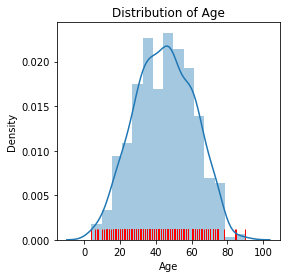

In [16]:
plt.figure(figsize=(4,4))
plt.title('Distribution of Age')
sns.distplot(liver_df['Age'], rug= True, rug_kws={'color': 'red'}) 
#Hist = False or rug = True (give data points details)
plt.ylabel('Density')

In [65]:
encoded_liver_df = pd.get_dummies(liver_df, columns=["Gender"])

encoded_liver_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 578 entries, 0 to 581
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             578 non-null    int64  
 1   Total Bilirubin                 578 non-null    float64
 2   Direct Bilirubin                578 non-null    float64
 3   Alkaline Phosphotase            578 non-null    int64  
 4   Alamine Aminotransferase        578 non-null    int64  
 5   Aspartate Aminotransferase      578 non-null    int64  
 6   Total Protiens                  578 non-null    float64
 7   Albumin                         578 non-null    float64
 8   A/G Ratio Albumin and Globulin  578 non-null    float64
 9   Class                           578 non-null    int64  
 10  Gender_Female                   578 non-null    uint8  
 11  Gender_Male                     578 non-null    uint8  
dtypes: float64(5), int64(5), uint8(2)
me

AxesSubplot(0.125,0.125;0.775x0.755)


Text(0.5, 1.0, 'Box-plot for Indian Liver Patient Disease')

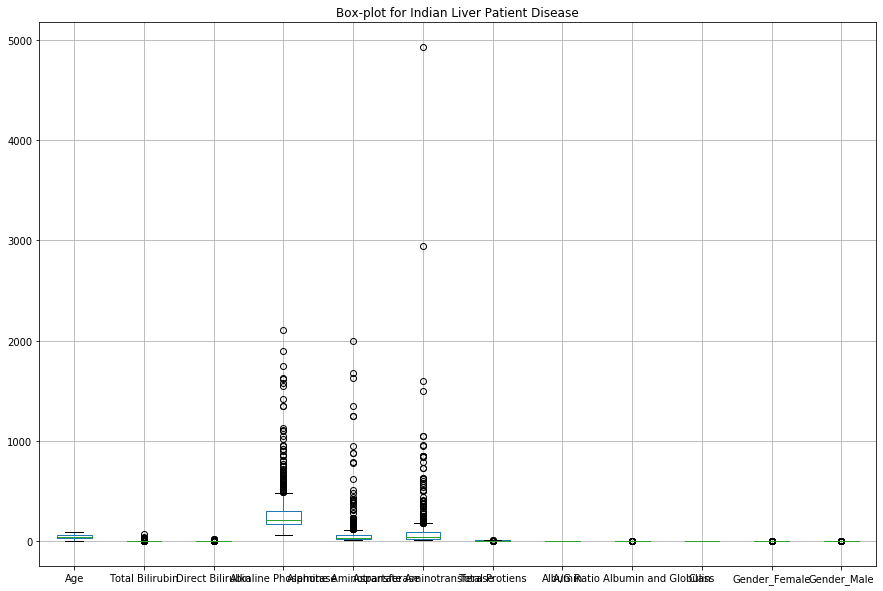

In [18]:
plt.figure(figsize=(15, 10))
print (encoded_liver_df.boxplot() )
plt.title('Box-plot for Indian Liver Patient Disease')

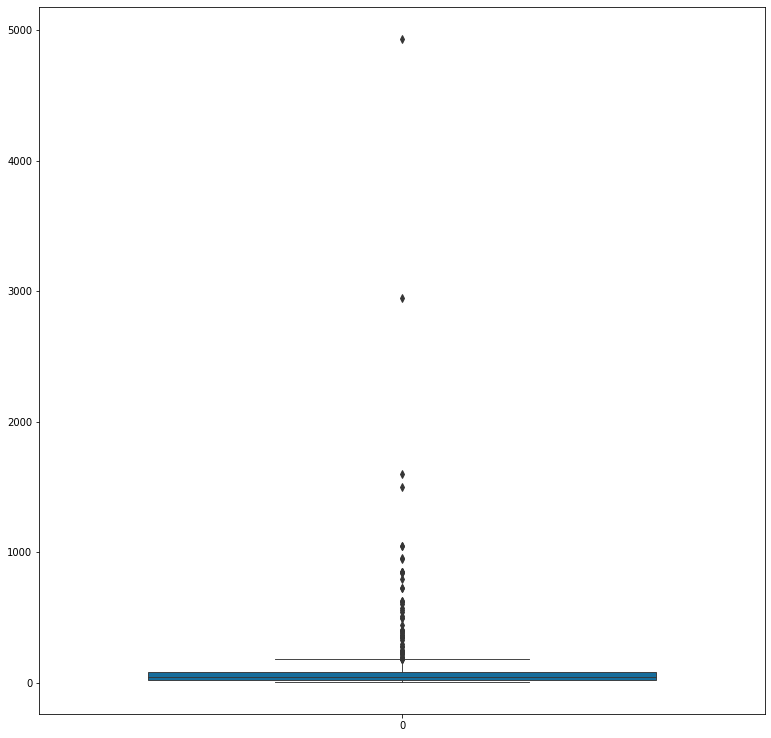

In [19]:
plt.figure(figsize=(13, 13))
bplot = sns.boxplot(data=encoded_liver_df['Aspartate Aminotransferase'],
                 width=0.7,
                 palette="colorblind",linewidth=0.9)

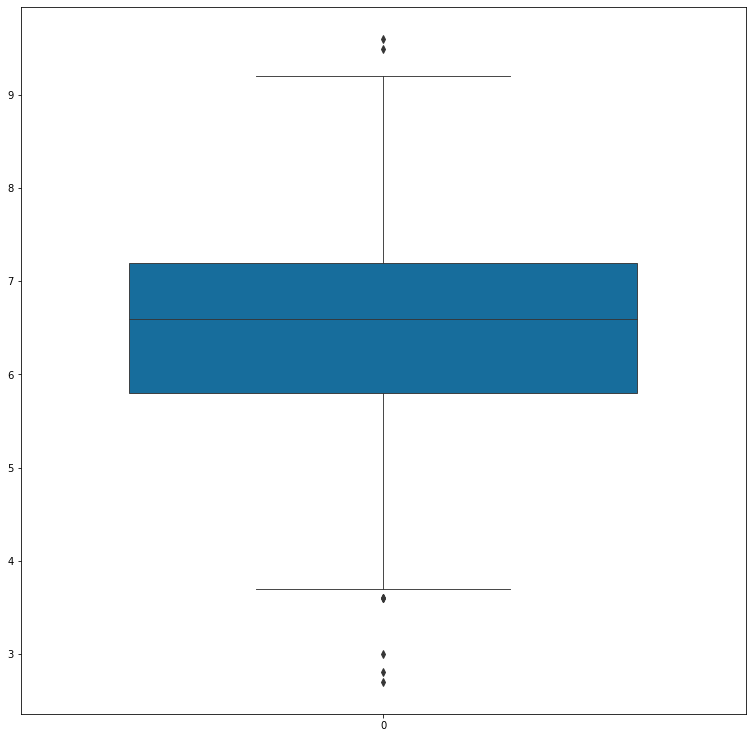

In [20]:
plt.figure(figsize=(13, 13))
bplot = sns.boxplot(data=encoded_liver_df['Total Protiens'],
                 width=0.7,
                 palette="colorblind",linewidth=0.9)

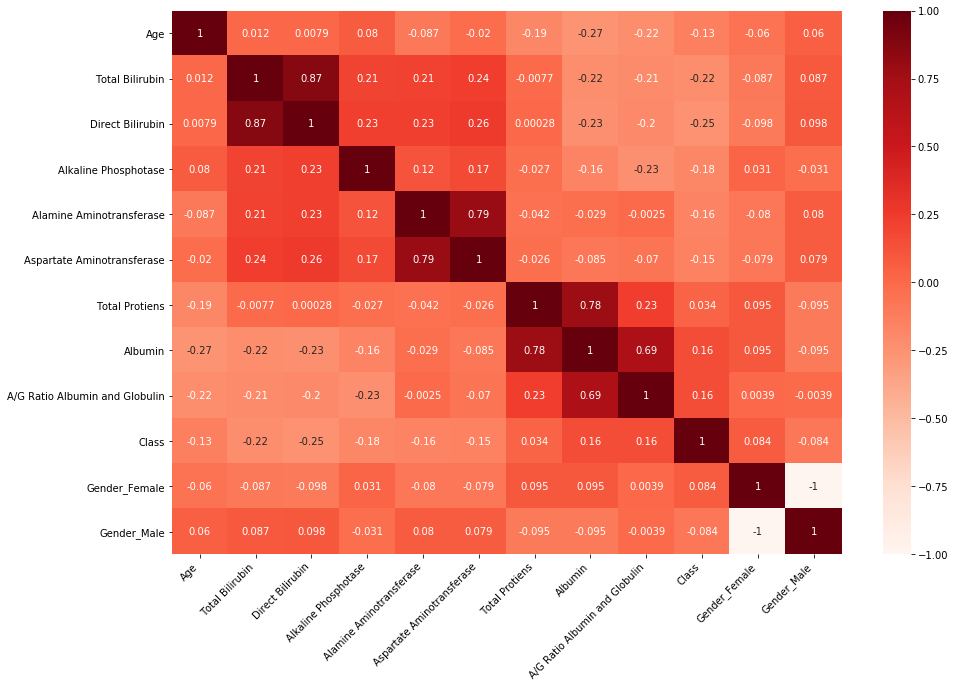

In [16]:
plt.figure(figsize=(15,10))
cor = encoded_liver_df.corr(method='pearson')
ax = sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.show()

In [75]:
cor_target = cor["Class"]
plt.title("Pearson Coefficient of features correlation on target attribute")
cor_target.plot(kind='barh')

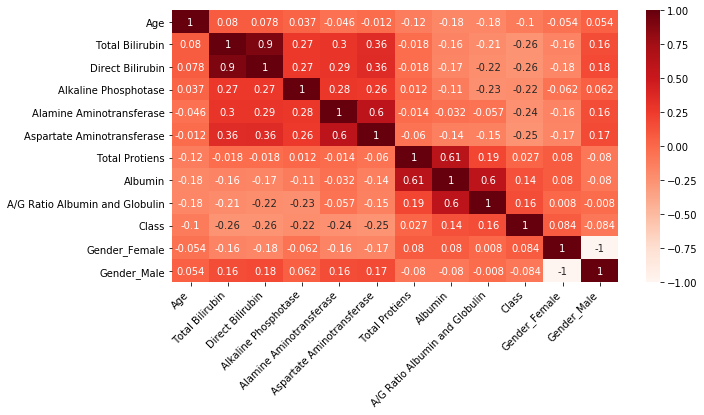

In [57]:
plt.figure(figsize=(10,5))
kendall_corr = encoded_liver_df.corr(method='kendall')
ax = sns.heatmap(kendall_corr, annot=True, cmap=plt.cm.Reds)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.show()

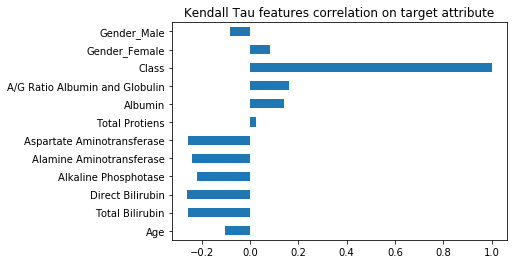

In [76]:
kendall_corr_target = kendall_corr["Class"]
plt.title("Kendall Tau features correlation on target attribute")
kendall_corr_target.plot(kind='barh')

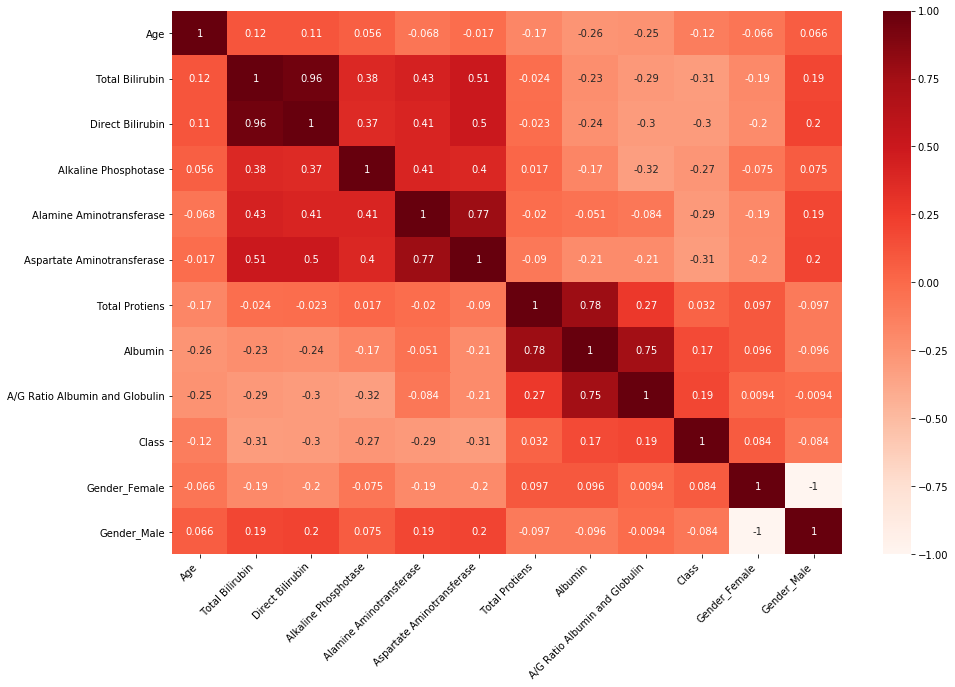

In [54]:
plt.figure(figsize=(15,10))
spearman_corr = encoded_liver_df.corr(method='spearman')
ax = sns.heatmap(spearman_corr, annot=True, cmap=plt.cm.Reds)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.show()

In [74]:
spearman_corr_target = spearman_corr["Class"]
plt.title("Spearman rank features correlation on target attribute")
spearman_corr_target.plot(kind='barh')

In [59]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(encoded_liver_df['Total Bilirubin'], encoded_liver_df['Direct Bilirubin'])
ax.set_xlabel('Total Bilirubin')
ax.set_ylabel('Direct Bilirubin')
plt.title('Scatter plot for Total Bilirubin Vs Direct Bilirubin')
plt.show()

In [61]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(encoded_liver_df['Total Protiens'], encoded_liver_df['Albumin'])
ax.set_xlabel('Total Proteins')
ax.set_ylabel('Albumin')
plt.title('Scatter plot for Total Proteins Vs Albumin')
plt.show()

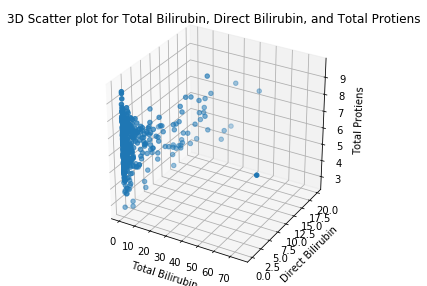

In [63]:
from mpl_toolkits.mplot3d import Axes3D

fig_3D = plt.figure(figsize=(5,5))
ax_3D = fig_3D.add_subplot(111, projection = '3d')

x = encoded_liver_df['Total Bilirubin']
y = encoded_liver_df['Direct Bilirubin']
z = encoded_liver_df['Total Protiens']

ax_3D.scatter(x, y, z)
ax_3D.set_xlabel("Total Bilirubin")
ax_3D.set_ylabel("Direct Bilirubin")
ax_3D.set_zlabel("Total Protiens")

plt.title('3D Scatter plot for Total Bilirubin, Direct Bilirubin, and Total Protiens')
plt.show()

In [66]:
data = encoded_liver_df[['Alkaline Phosphotase','Alamine Aminotransferase','Aspartate Aminotransferase']]
scaler = StandardScaler()
# transfor data
encoded_liver_df[['Alkaline Phosphotase','Alamine Aminotransferase','Aspartate Aminotransferase']] = scaler.fit_transform(data)

encoded_liver_df

Age  Total Bilirubin  Direct Bilirubin  Alkaline Phosphotase  \
0     62             10.9               5.5              1.673161   
1     62              7.3               4.1              0.814926   
2     58              1.0               0.4             -0.449841   
3     72              3.9               2.0             -0.396458   
4     46              1.8               0.7             -0.343075   
..   ...              ...               ...                   ...   
577   60              0.5               0.1              0.855990   
578   40              0.6               0.1             -0.794778   
579   52              0.8               0.2             -0.191139   
580   31              1.3               0.5             -0.441628   
581   38              1.0               0.3             -0.310224   

     Alamine Aminotransferase  Aspartate Aminotransferase  Total Protiens  \
0                   -0.094117                   -0.036486             7.5   
1                   -0.115956                   -0.146897             7.0   
2                   -0.367098                   -0.312515             6.8   
3                   -0.296123                   -0.177950             7.3   
4                   -0.339800                   -0.333217             7.6   
..                        ...                         ...             ...   
577                 -0.334341                   -0.264210             5.9   
578                 -0.252446                   -0.274561             6.0   
579                 -0.181471                   -0.212454             6.4   
580                 -0.285204                   -0.271110             6.8   
581                 -0.328881                   -0.298713             7.3   

     Albumin  A/G Ratio Albumin and Globulin  Class  Gender_Female  \
0        3.2                            0.74      1              0   
1        3.3                            0.89      1              0   
2        3.4                            1.00      1              0   
3        2.4                            0.40      1              0   
4        4.4                            1.30      1              0   
..       ...                             ...    ...            ...   
577      1.6                            0.37      0              0   
578      3.2                            1.10      1              0   
579      3.2                            1.00      1              0   
580      3.4                            1.00      1              0   
581      4.4                            1.50      0              0   

     Gender_Male  
0              1  
1              1  
2              1  
3              1  
4              1  
..           ...  
577            1  
578            1  
579            1  
580            1  
581            1  

[578 rows x 12 columns]

In [67]:
x= encoded_liver_df.drop(['Class'], axis=1)
x
y = encoded_liver_df['Class']
print(x)



     Age  Total Bilirubin  Direct Bilirubin  Alkaline Phosphotase  \
0     62             10.9               5.5              1.673161   
1     62              7.3               4.1              0.814926   
2     58              1.0               0.4             -0.449841   
3     72              3.9               2.0             -0.396458   
4     46              1.8               0.7             -0.343075   
..   ...              ...               ...                   ...   
577   60              0.5               0.1              0.855990   
578   40              0.6               0.1             -0.794778   
579   52              0.8               0.2             -0.191139   
580   31              1.3               0.5             -0.441628   
581   38              1.0               0.3             -0.310224   

     Alamine Aminotransferase  Aspartate Aminotransferase  Total Protiens  \
0                   -0.094117                   -0.036486             7.5   
1                

In [73]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x,y)
#print(model.feature_importances_)

feat_importances = pd.Series(model.feature_importances_, index=(encoded_liver_df.drop('Class', axis=1)).columns)
feat_importances.nlargest(12).plot(kind='barh')
#plt.xlim([0,0.01])
plt.title('Random Forest Feature Importance')
plt.figure(figsize=(2,2))
plt.show()

<Figure size 144x144 with 0 Axes>

In [145]:
print(model.feature_importances_)

[0.12347133 0.09958569 0.08526527 0.14746721 0.12878158 0.13524252
 0.08514996 0.08646044 0.07913898 0.0133721  0.01606491]


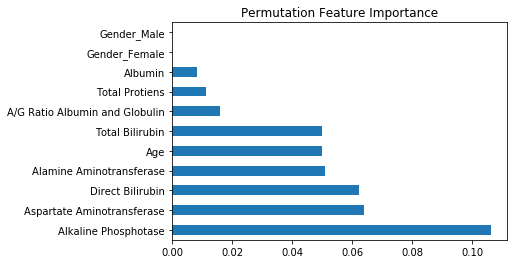

<Figure size 144x144 with 0 Axes>

In [72]:
from sklearn.inspection import permutation_importance


# perform permutation importance
results = permutation_importance(model, x, y, scoring='accuracy')
# get importance
importance = results.importances_mean

Permutation_feat_importances = pd.Series(importance, index=(encoded_liver_df.drop('Class', axis=1)).columns)
Permutation_feat_importances.nlargest(25).plot(kind='barh')
plt.title('Permutation Feature Importance')
plt.figure(figsize=(2,2))
plt.show()

In [72]:
from imblearn.under_sampling import NearMiss, RandomUnderSampler
from imblearn.over_sampling import SMOTE, ADASYN
import lightgbm as lgb
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from imblearn.metrics import  geometric_mean_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, f1_score, precision_recall_curve, precision_score 
from sklearn.metrics import recall_score, average_precision_score, auc

In [73]:
def sampling_modeling(sampler, model, x, y, k):
    kf = KFold(n_splits=k, shuffle = True, random_state=1)
    acc_score = []
    recal_score = []
    pres_score = []
    _fscore = []
    aucroc_score = []
    gmean_score = []
    for train_index , test_index in kf.split(x):
        X_train , X_test = x.iloc[train_index,:],x.iloc[test_index,:]
        y_train , y_test = y.iloc[train_index] , y.iloc[test_index]
    
        #sampler_nearmiss = NearMiss()
        sampled_x, sampled_y = sampler.fit_resample(X_train, y_train)
    #construct_pipeline = make_pipeline(sampler, model)
        model.fit(sampled_x,sampled_y)
        pred_values = model.predict(X_test)
        acc, recal, precis, aucroc, gmean, _val = evaluation(pred_values, y_test)
        #print(acc)
        #print(precis)
        acc_score.append(acc)
        recal_score.append(recal)
        pres_score.append(precis)
        _fscore.append(_val)
        aucroc_score.append(aucroc)
        gmean_score.append(gmean)
        #print(f_val)
    
    avg_acc_score = sum(acc_score)/k
    avg_recal_score = sum(recal_score)/k
    avg_precis_score = sum(pres_score)/k
    avg_f_score = sum(_fscore)/k
    avg_auc_score = sum(aucroc_score)/k
    avg_gmean_score = sum(gmean_score)/k
    print('Metrics for each fold of {0}, {1}'.format(sampler, model))
    print('Accuracy : {0}'.format(acc_score))
    print('Avg accuracy : {}'.format(avg_acc_score))
    print('Recall : {0}'.format(recal_score))
    print('Avg recall : {}'.format(avg_recal_score))
    print('Precision : {0}'.format(pres_score))
    print('Avg precision : {}'.format(avg_precis_score))
    print('F1_score : {0}'.format(_fscore))
    print('Avg f-score : {}'.format(avg_f_score))
    print('AUC_ROC : {0}'.format(aucroc_score))
    print('Avg AUC_ROC : {}'.format(avg_auc_score))
    print('Geometric mean : {0}'.format(gmean_score))
    print('Avg gmean : {}'.format(avg_gmean_score))
    
        
      
    

In [74]:
def modelling_without_sampling(model, x, y, k):
    kf = KFold(n_splits=k, shuffle = True, random_state=1)
    acc_score = []
    recal_score = []
    pres_score = []
    _fscore = []
    aucroc_score = []
    gmean_score = []
    for train_index , test_index in kf.split(x):
        X_train , X_test = x.iloc[train_index,:],x.iloc[test_index,:]
        y_train , y_test = y.iloc[train_index] , y.iloc[test_index]
        model.fit(X_train, y_train)
        pred_values = model.predict(X_test)
        acc, recal, precis, aucroc, gmean, _val = evaluation(pred_values, y_test)
        #print(acc)
        #print(precis)
        acc_score.append(acc)
        recal_score.append(recal)
        pres_score.append(precis)
        _fscore.append(_val)
        aucroc_score.append(aucroc)
        gmean_score.append(gmean)
        #print(f_val)
    
    avg_acc_score = sum(acc_score)/k
    avg_recal_score = sum(recal_score)/k
    avg_precis_score = sum(pres_score)/k
    avg_f_score = sum(_fscore)/k
    avg_auc_score = sum(aucroc_score)/k
    avg_gmean_score = sum(gmean_score)/k
    print('Metrics for each fold of {0}'.format(model))
    print('Accuracy : {0}'.format(acc_score))
    print('Avg accuracy : {}'.format(avg_acc_score))
    print('Recall : {0}'.format(recal_score))
    print('Avg recall : {}'.format(avg_recal_score))
    print('Precision : {0}'.format(pres_score))
    print('Avg precision : {}'.format(avg_precis_score))
    print('F1_score : {0}'.format(_fscore))
    print('Avg f-score : {}'.format(avg_f_score))
    print('AUC_ROC : {0}'.format(aucroc_score))
    print('Avg AUC_ROC : {}'.format(avg_auc_score))
    print('Geometric mean : {0}'.format(gmean_score))
    print('Avg gmean : {}'.format(avg_gmean_score))
    
        
      
    

In [75]:
def evaluation(pred_values, y_test):
    
    acc = accuracy_score(y_test, pred_values)
    recal = recall_score(y_test, pred_values)
    precis = precision_score(y_test, pred_values)
    #val = f1_score(y_test, pred_values)
    aucroc = roc_auc_score(y_test, pred_values)
    _val = f1_score(y_test, pred_values)
    gmean = geometric_mean_score(y_test, pred_values)
    return acc, recal, precis, aucroc, gmean, _val
    
    
   


# Resampling and Modelling with balanced data

In [76]:
model = lgb.LGBMClassifier(objective='binary', random_state=0, n_jobs=-1)
sampler_nearmiss = NearMiss()
sampling_modeling(sampler_nearmiss, model, x, y, k = 5)

Metrics for each fold of NearMiss(), LGBMClassifier(objective='binary', random_state=0)
Accuracy : [0.49137931034482757, 0.5431034482758621, 0.4396551724137931, 0.5304347826086957, 0.5130434782608696]
Avg accuracy : 0.5035232383808097
Recall : [0.44871794871794873, 0.550561797752809, 0.37037037037037035, 0.5542168674698795, 0.5]
Avg recall : 0.48477339686220144
Precision : [0.6862745098039216, 0.7903225806451613, 0.6818181818181818, 0.7301587301587301, 0.7321428571428571]
Avg precision : 0.7241433719137704
F1_score : [0.5426356589147288, 0.6490066225165563, 0.48, 0.6301369863013699, 0.5942028985507246]
Avg f-score : 0.5791964332566759
AUC_ROC : [0.5138326585695007, 0.5345401581356639, 0.4851851851851851, 0.5114834337349398, 0.5227272727272727]
Avg AUC_ROC : 0.5135537416705125
Geometric mean : [0.5096901760614474, 0.5342999978698098, 0.4714045207910317, 0.5096951604895872, 0.5222329678670935]
Avg gmean : 0.5094645646157938


In [77]:
model = lgb.LGBMClassifier(objective='binary', random_state=0, n_jobs=-1)
sampler_random = RandomUnderSampler(random_state=0)
sampling_modeling(sampler_random, model, x, y, k = 5)

Metrics for each fold of RandomUnderSampler(random_state=0), LGBMClassifier(objective='binary', random_state=0)
Accuracy : [0.7068965517241379, 0.7068965517241379, 0.5775862068965517, 0.6173913043478261, 0.6347826086956522]
Avg accuracy : 0.6487106446776612
Recall : [0.7435897435897436, 0.6741573033707865, 0.5802469135802469, 0.6506024096385542, 0.6463414634146342]
Avg recall : 0.6589875667187931
Precision : [0.8055555555555556, 0.9230769230769231, 0.7580645161290323, 0.782608695652174, 0.803030303030303]
Avg precision : 0.8144671986887975
F1_score : [0.7733333333333334, 0.7792207792207791, 0.6573426573426573, 0.7105263157894737, 0.7162162162162163]
Avg f-score : 0.7273278603804919
AUC_ROC : [0.6875843454790823, 0.7444860590928007, 0.5758377425044091, 0.5909262048192772, 0.6262010347376201]
Avg AUC_ROC : 0.6450070773266379
Geometric mean : [0.6852996625786156, 0.7411567703948486, 0.5758208618164145, 0.5879052050462573, 0.6258770638385562]
Avg gmean : 0.6432119127349385


In [78]:
model = lgb.LGBMClassifier(objective='binary', random_state=0, n_jobs=-1)
sampler_smt = SMOTE(random_state=0)
sampling_modeling(sampler_smt, model, x, y, k = 5)

Metrics for each fold of SMOTE(random_state=0), LGBMClassifier(objective='binary', random_state=0)
Accuracy : [0.7327586206896551, 0.6896551724137931, 0.646551724137931, 0.6173913043478261, 0.7043478260869566]
Avg accuracy : 0.6781409295352324
Recall : [0.8333333333333334, 0.7640449438202247, 0.7530864197530864, 0.7108433734939759, 0.7804878048780488]
Avg recall : 0.7683591750557339
Precision : [0.7831325301204819, 0.8192771084337349, 0.7439024390243902, 0.7468354430379747, 0.8]
Avg precision : 0.7786295041233163
F1_score : [0.8074534161490683, 0.7906976744186045, 0.7484662576687118, 0.728395061728395, 0.7901234567901235]
Avg f-score : 0.7730271733509806
AUC_ROC : [0.6798245614035089, 0.6042446941323346, 0.5765432098765433, 0.5429216867469879, 0.647819660014782]
Avg AUC_ROC : 0.6102707624348314
Geometric mean : [0.6622661785325219, 0.5827310962929355, 0.5488484015657098, 0.5163005569048332, 0.6340894851992162]
Avg gmean : 0.5888471436990433


In [79]:
model = lgb.LGBMClassifier(objective='binary', random_state=0, n_jobs=-1)
sampler_ada = ADASYN(random_state=0)
sampling_modeling(sampler_ada, model, x, y, k = 5)

Metrics for each fold of ADASYN(random_state=0), LGBMClassifier(objective='binary', random_state=0)
Accuracy : [0.7068965517241379, 0.7155172413793104, 0.646551724137931, 0.6086956521739131, 0.6434782608695652]
Avg accuracy : 0.6642278860569715
Recall : [0.8717948717948718, 0.7865168539325843, 0.7777777777777778, 0.7228915662650602, 0.7317073170731707]
Avg recall : 0.778137677368693
Precision : [0.7391304347826086, 0.8333333333333334, 0.7325581395348837, 0.7317073170731707, 0.759493670886076]
Avg precision : 0.7592445791220144
F1_score : [0.7999999999999999, 0.8092485549132948, 0.7544910179640719, 0.7272727272727273, 0.7453416149068323]
Avg f-score : 0.7672707830113853
AUC_ROC : [0.6201079622132254, 0.6339991677070329, 0.5603174603174603, 0.5176957831325302, 0.5779748706577975]
Avg AUC_ROC : 0.5820190488056094
Geometric mean : [0.566734139033003, 0.6153806139631104, 0.5163977794943222, 0.47529318789335845, 0.557154633859436]
Avg gmean : 0.546192070848646


In [80]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=0)
sampler_smote = SMOTE(random_state=0)
sampling_modeling(sampler_smote, model, x, y, k = 5)

Metrics for each fold of SMOTE(random_state=0), RandomForestClassifier(random_state=0)
Accuracy : [0.7155172413793104, 0.7068965517241379, 0.6724137931034483, 0.6173913043478261, 0.7304347826086957]
Avg accuracy : 0.6885307346326837
Recall : [0.782051282051282, 0.7528089887640449, 0.7283950617283951, 0.7469879518072289, 0.7804878048780488]
Avg recall : 0.7581462178457998
Precision : [0.7922077922077922, 0.8481012658227848, 0.7866666666666666, 0.7294117647058823, 0.8311688311688312]
Avg precision : 0.7975112641143914
F1_score : [0.7870967741935484, 0.7976190476190476, 0.7564102564102564, 0.7380952380952379, 0.8050314465408805]
Avg f-score : 0.7768505525717941
AUC_ROC : [0.6804993252361673, 0.6541822721598002, 0.6356261022927691, 0.5141189759036144, 0.6932742054693274]
Avg AUC_ROC : 0.6355401762123357
Geometric mean : [0.6728792846520839, 0.646704890951062, 0.6288198963782307, 0.4583561513122554, 0.6877666116113098]
Avg gmean : 0.6189053669809883


In [81]:
model = RandomForestClassifier(random_state=0)
sampler_ADASYN = ADASYN(random_state=0)
sampling_modeling(sampler_ADASYN, model, x, y, k = 5)

Metrics for each fold of ADASYN(random_state=0), RandomForestClassifier(random_state=0)
Accuracy : [0.7241379310344828, 0.7241379310344828, 0.6810344827586207, 0.6521739130434783, 0.7391304347826086]
Avg accuracy : 0.7041229385307346
Recall : [0.8589743589743589, 0.797752808988764, 0.7530864197530864, 0.7831325301204819, 0.7682926829268293]
Avg recall : 0.7922477601527043
Precision : [0.7613636363636364, 0.8352941176470589, 0.782051282051282, 0.7471264367816092, 0.8513513513513513]
Avg precision : 0.7954373648389875
F1_score : [0.8072289156626505, 0.8160919540229884, 0.7672955974842767, 0.7647058823529411, 0.8076923076923077]
Avg f-score : 0.7926029314430328
AUC_ROC : [0.6531713900134952, 0.6396171452351227, 0.6336860670194003, 0.547816265060241, 0.717479674796748]
Avg AUC_ROC : 0.6383541084250014
Geometric mean : [0.6199016072725213, 0.6197606024328454, 0.6223355905792206, 0.4947008345077362, 0.7156780854205468]
Avg gmean : 0.614475344042574


In [82]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=0)
sampler_nearmiss = NearMiss()
sampling_modeling(sampler_nearmiss, model, x, y, k = 5)

Metrics for each fold of NearMiss(), RandomForestClassifier(random_state=0)
Accuracy : [0.35344827586206895, 0.4051724137931034, 0.3706896551724138, 0.46956521739130436, 0.45217391304347826]
Avg accuracy : 0.4102098950524738
Recall : [0.21794871794871795, 0.3595505617977528, 0.30864197530864196, 0.37349397590361444, 0.3780487804878049]
Avg recall : 0.3275368022893064
Precision : [0.5483870967741935, 0.7272727272727273, 0.5952380952380952, 0.775, 0.7209302325581395]
Avg precision : 0.6733656303686311
F1_score : [0.3119266055045872, 0.481203007518797, 0.4065040650406504, 0.5040650406504064, 0.49600000000000005]
Avg f-score : 0.4399397437428882
AUC_ROC : [0.42476383265856954, 0.4575530586766542, 0.4114638447971781, 0.5461219879518072, 0.5072062084257206]
Avg AUC_ROC : 0.46942178650198596
Geometric mean : [0.3710145844334804, 0.4469343487693273, 0.3984095364447979, 0.5181204446658353, 0.49048598009938843]
Avg gmean : 0.44499297888256584


In [83]:
from imblearn.under_sampling import RandomUnderSampler
model = RandomForestClassifier(random_state=0)
sampler_random_under = RandomUnderSampler(random_state=0)
sampling_modeling(sampler_random_under, model, x, y, k = 5)

Metrics for each fold of RandomUnderSampler(random_state=0), RandomForestClassifier(random_state=0)
Accuracy : [0.6724137931034483, 0.6724137931034483, 0.5862068965517241, 0.6608695652173913, 0.6260869565217392]
Avg accuracy : 0.6435982008995502
Recall : [0.7051282051282052, 0.5955056179775281, 0.5555555555555556, 0.6626506024096386, 0.5853658536585366]
Avg recall : 0.6208411669458929
Precision : [0.7857142857142857, 0.9636363636363636, 0.7894736842105263, 0.8333333333333334, 0.8421052631578947]
Avg precision : 0.842852586010481
F1_score : [0.7432432432432433, 0.736111111111111, 0.6521739130434783, 0.7382550335570471, 0.6906474820143884]
Avg f-score : 0.7120861565938537
AUC_ROC : [0.655195681511471, 0.760715771951727, 0.6063492063492063, 0.6594503012048192, 0.656319290465632]
Avg AUC_ROC : 0.6676060502965712
Geometric mean : [0.6532902296503027, 0.7425591496439414, 0.6042179781166439, 0.659442535655174, 0.6524726973924442]
Avg gmean : 0.6623965180917012


In [84]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(random_state=0)
sampler_random_under = RandomUnderSampler(random_state=0)
sampling_modeling(sampler_random_under, model, x, y, k = 5)

Metrics for each fold of RandomUnderSampler(random_state=0), AdaBoostClassifier(random_state=0)
Accuracy : [0.6551724137931034, 0.6637931034482759, 0.5431034482758621, 0.6434782608695652, 0.6260869565217392]
Avg accuracy : 0.6263268365817092
Recall : [0.6538461538461539, 0.5842696629213483, 0.5555555555555556, 0.6626506024096386, 0.6341463414634146]
Avg recall : 0.6180936632392222
Precision : [0.796875, 0.9629629629629629, 0.7258064516129032, 0.8088235294117647, 0.8]
Avg precision : 0.818893588797526
F1_score : [0.7183098591549296, 0.7272727272727273, 0.6293706293706294, 0.7284768211920529, 0.7074829931972789]
Avg f-score : 0.7021826060375236
AUC_ROC : [0.6558704453441295, 0.7550977944236371, 0.5349206349206349, 0.6282003012048193, 0.6201034737620104]
Avg AUC_ROC : 0.6388385299310462
Geometric mean : [0.6558673214300573, 0.7355205154384737, 0.5345224838248488, 0.6272549682391706, 0.6199444459291761]
Avg gmean : 0.6346219469723453


In [85]:
model = AdaBoostClassifier(random_state=0)
sampler_nearmiss = NearMiss()
sampling_modeling(sampler_nearmiss, model, x, y, k = 5)

Metrics for each fold of NearMiss(), AdaBoostClassifier(random_state=0)
Accuracy : [0.5, 0.4396551724137931, 0.33620689655172414, 0.3826086956521739, 0.43478260869565216]
Avg accuracy : 0.4186506746626687
Recall : [0.3974358974358974, 0.449438202247191, 0.2839506172839506, 0.3132530120481928, 0.3902439024390244]
Avg recall : 0.3668643262908512
Precision : [0.7380952380952381, 0.7142857142857143, 0.5476190476190477, 0.65, 0.6808510638297872]
Avg precision : 0.6661702127659574
F1_score : [0.5166666666666667, 0.5517241379310346, 0.3739837398373984, 0.42276422764227645, 0.49612403100775193]
Avg f-score : 0.47225256061702564
AUC_ROC : [0.5539811066126855, 0.4284228048272992, 0.37054673721340387, 0.4378765060240964, 0.46784922394678485]
Avg AUC_ROC : 0.451735275724854
Geometric mean : [0.5314025441862424, 0.42790706089917946, 0.3602859926123455, 0.41976757768687717, 0.4613678688652755]
Avg gmean : 0.440146208849984


In [86]:
model = AdaBoostClassifier(random_state=0)
sampler_smt1 = SMOTE(random_state=0)
sampling_modeling(sampler_smt1, model, x, y, k = 5)

Metrics for each fold of SMOTE(random_state=0), AdaBoostClassifier(random_state=0)
Accuracy : [0.6896551724137931, 0.7068965517241379, 0.5862068965517241, 0.6521739130434783, 0.6608695652173913]
Avg accuracy : 0.6591604197901049
Recall : [0.7564102564102564, 0.7303370786516854, 0.5925925925925926, 0.7228915662650602, 0.7073170731707317]
Avg recall : 0.7019097134180653
Precision : [0.7763157894736842, 0.8666666666666667, 0.7619047619047619, 0.7792207792207793, 0.7945205479452054]
Avg precision : 0.7957257090422195
F1_score : [0.7662337662337663, 0.7926829268292682, 0.6666666666666666, 0.75, 0.7483870967741935]
Avg f-score : 0.7447940913007789
AUC_ROC : [0.6545209176788124, 0.6799833541406576, 0.582010582010582, 0.5958207831325302, 0.6263858093126385]
Avg AUC_ROC : 0.6277442892550441
Geometric mean : [0.6465417189416193, 0.6781164091335988, 0.5819143739626463, 0.5821128942797497, 0.6211355026389821]
Avg gmean : 0.6219641797913192


In [87]:
model = AdaBoostClassifier(random_state=0)
sampler_ada = ADASYN(random_state=0)
sampling_modeling(sampler_ada, model, x, y, k = 5)

Metrics for each fold of ADASYN(random_state=0), AdaBoostClassifier(random_state=0)
Accuracy : [0.6293103448275862, 0.7241379310344828, 0.6206896551724138, 0.6608695652173913, 0.6260869565217392]
Avg accuracy : 0.6522188905547226
Recall : [0.7307692307692307, 0.7078651685393258, 0.654320987654321, 0.6987951807228916, 0.6219512195121951]
Avg recall : 0.6827403574395928
Precision : [0.7215189873417721, 0.9130434782608695, 0.7681159420289855, 0.8055555555555556, 0.8095238095238095]
Avg precision : 0.8035515545421983
F1_score : [0.7261146496815285, 0.7974683544303798, 0.7066666666666667, 0.7483870967741936, 0.7034482758620689]
Avg f-score : 0.7364170086829676
AUC_ROC : [0.5759109311740891, 0.7428214731585517, 0.598589065255732, 0.6306475903614458, 0.6291574279379157]
Avg AUC_ROC : 0.6354252975775468
Geometric mean : [0.554700196225229, 0.741998516004452, 0.5959889444188445, 0.6269547744109032, 0.6291161575492865]
Avg gmean : 0.6297517177217431


# Modelling with Imbalanced data

In [88]:
model = lgb.LGBMClassifier(objective='binary', random_state=0, n_jobs=-1)
modelling_without_sampling(model, x, y, k = 5)

Metrics for each fold of LGBMClassifier(objective='binary', random_state=0)
Accuracy : [0.7068965517241379, 0.6724137931034483, 0.6896551724137931, 0.6521739130434783, 0.7304347826086957]
Avg accuracy : 0.6903148425787107
Recall : [0.8717948717948718, 0.7640449438202247, 0.8271604938271605, 0.7590361445783133, 0.8658536585365854]
Avg recall : 0.8175780225114313
Precision : [0.7391304347826086, 0.8, 0.7528089887640449, 0.7590361445783133, 0.7802197802197802]
Avg precision : 0.7662390696689494
F1_score : [0.7999999999999999, 0.7816091954022989, 0.7882352941176471, 0.7590361445783133, 0.8208092485549133]
Avg f-score : 0.7899379765306345
AUC_ROC : [0.6201079622132254, 0.5672076570952975, 0.599294532627866, 0.5670180722891567, 0.6298965262379896]
Avg AUC_ROC : 0.5967049500927071
Geometric mean : [0.566734139033003, 0.5319582773322598, 0.5542842597119044, 0.5335152802093558, 0.5840324181790848]
Avg gmean : 0.5541048748931215


In [89]:
model = AdaBoostClassifier(random_state=0)
modelling_without_sampling(model, x, y, k = 5)

Metrics for each fold of AdaBoostClassifier(random_state=0)
Accuracy : [0.6637931034482759, 0.7241379310344828, 0.6896551724137931, 0.6695652173913044, 0.6695652173913044]
Avg accuracy : 0.6833433283358321
Recall : [0.7692307692307693, 0.8089887640449438, 0.8395061728395061, 0.8313253012048193, 0.8170731707317073]
Avg recall : 0.8132248356103492
Precision : [0.7407407407407407, 0.8275862068965517, 0.7472527472527473, 0.7419354838709677, 0.7444444444444445]
Avg precision : 0.7603919246410904
F1_score : [0.7547169811320754, 0.8181818181818181, 0.7906976744186047, 0.7840909090909092, 0.7790697674418605]
Avg f-score : 0.7853514300530536
AUC_ROC : [0.6082995951417004, 0.6267166042446941, 0.5911816578483244, 0.5406626506024097, 0.5600517368810052]
Avg AUC_ROC : 0.5853824489436268
Geometric mean : [0.586625565975325, 0.5996253511966891, 0.5364985441086376, 0.4558852106629528, 0.4975921326998245]
Avg gmean : 0.5352453609286858


In [90]:
model = RandomForestClassifier(random_state=0)
modelling_without_sampling(model, x, y, k = 5)

Metrics for each fold of RandomForestClassifier(random_state=0)
Accuracy : [0.6810344827586207, 0.75, 0.646551724137931, 0.6434782608695652, 0.6956521739130435]
Avg accuracy : 0.683343328335832
Recall : [0.8846153846153846, 0.8764044943820225, 0.8395061728395061, 0.8072289156626506, 0.8658536585365854]
Avg recall : 0.8547217252072299
Precision : [0.711340206185567, 0.8125, 0.7083333333333334, 0.7282608695652174, 0.7473684210526316]
Avg precision : 0.7415605660273499
F1_score : [0.7885714285714285, 0.8432432432432433, 0.768361581920904, 0.7657142857142857, 0.8022598870056497]
Avg f-score : 0.7936300852911022
AUC_ROC : [0.5738866396761133, 0.6048689138576779, 0.519753086419753, 0.5129894578313253, 0.5692904656319291]
Avg AUC_ROC : 0.5561577126833598
Geometric mean : [0.48248681045931857, 0.5404949874519412, 0.4097575314352394, 0.42021580800965214, 0.4859443454487501]
Avg gmean : 0.4677798965609803
